# Using Machine Learning (k-nearest neighbors) to predict car market price

## 1. Introduction

Using various car attributes, accurately predict the market prices of some cars

Obtain the data from here:
https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data                      
More info fromt he dataset:
https://archive.ics.uci.edu/ml/datasets/automobile

In [1]:
import pandas as pd
import numpy as np

column_headers = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 
                  'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 
                  'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_rate', 
                  'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

cars = pd.read_csv('imports-85.data', names=column_headers)

In [2]:
cars.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg',
       'price'],
      dtype='object')

In [3]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: object

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_rate     205 non-null float64
horsepower           205 non-nul

In [6]:
cars['num_doors'] = cars['num_doors'].replace('one', '1')
cars['num_doors'] = cars['num_doors'].replace('two', '2')
cars['num_doors'] = cars['num_doors'].replace('three', '3')
cars['num_doors'] = cars['num_doors'].replace('four', '4')
cars.iloc[:10]['num_doors']

0    2
1    2
2    2
3    4
4    4
5    2
6    4
7    4
8    4
9    2
Name: num_doors, dtype: object

In [7]:
numerical_cols = ['bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'num_doors']
categorial_cols = ['make', 'fuel_type', 'aspiration', 'body_style', 'drive_wheels', 'engine_location', 'fuel_system', 'engine_type', 'num_cylinders']

Target column is 'price'                    

Numerical columns are 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg'
'wheel_base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num_cylinders', 'engine_size'             
          
Categorial features are 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'fuel_system'          


## 2. Cleaning the data

In [8]:
cars.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_rate     0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [9]:
cars = cars.replace('?', np.nan)

In [10]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [11]:
cars[numerical_cols]

,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,wheel_base,length,width,height,curb_weight,engine_size,num_doors
0,3.47,2.68,9.00,111,5000,21,27,88.6,168.8,64.1,48.8,2548,130,2
1,3.47,2.68,9.00,111,5000,21,27,88.6,168.8,64.1,48.8,2548,130,2
2,2.68,3.47,9.00,154,5000,19,26,94.5,171.2,65.5,52.4,2823,152,2
3,3.19,3.40,10.00,102,5500,24,30,99.8,176.6,66.2,54.3,2337,109,4
4,3.19,3.40,8.00,115,5500,18,22,99.4,176.6,66.4,54.3,2824,136,4
5,3.19,3.40,8.50,110,5500,19,25,99.8,177.3,66.3,53.1,2507,136,2
6,3.19,3.40,8.50,110,5500,19,25,105.8,192.7,71.4,55.7,2844,136,4
7,3.19,3.40,8.50,110,5500,19,25,105.8,192.7,71.4,55.7,2954,136,4
8,3.13,3.40,8.30,140,5500,17,20,105.8,192.7,71.4,55.9,3086,131,4
9,3.13,3.40,7.00,160,5500,16,22,99.5,178.2,67.9,52.0,3053,131,2


In [12]:
cars[categorial_cols]

,make,fuel_type,aspiration,body_style,drive_wheels,engine_location,fuel_system,engine_type,num_cylinders
0,alfa-romero,gas,std,convertible,rwd,front,mpfi,dohc,four
1,alfa-romero,gas,std,convertible,rwd,front,mpfi,dohc,four
2,alfa-romero,gas,std,hatchback,rwd,front,mpfi,ohcv,six
3,audi,gas,std,sedan,fwd,front,mpfi,ohc,four
4,audi,gas,std,sedan,4wd,front,mpfi,ohc,five
5,audi,gas,std,sedan,fwd,front,mpfi,ohc,five
6,audi,gas,std,sedan,fwd,front,mpfi,ohc,five
7,audi,gas,std,wagon,fwd,front,mpfi,ohc,five
8,audi,gas,turbo,sedan,fwd,front,mpfi,ohc,five
9,audi,gas,turbo,hatchback,4wd,front,mpfi,ohc,five


In [13]:
cars[numerical_cols] = cars[numerical_cols].astype(float)

In [14]:
cars[numerical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
bore                201 non-null float64
stroke              201 non-null float64
compression_rate    205 non-null float64
horsepower          203 non-null float64
peak_rpm            203 non-null float64
city_mpg            205 non-null float64
highway_mpg         205 non-null float64
wheel_base          205 non-null float64
length              205 non-null float64
width               205 non-null float64
height              205 non-null float64
curb_weight         205 non-null float64
engine_size         205 non-null float64
num_doors           203 non-null float64
dtypes: float64(14)
memory usage: 22.5 KB


In [15]:
cars.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_rate      0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

There are 41 null values for the normalized_losses column. I will just remove this entire column.

In [16]:
cars = cars.drop(['normalized_losses'], axis=1)

Removing rows where there are missing values in the price column

In [17]:
cars = cars.dropna(subset=['price'])
cars.isnull().sum()

symboling           0
make                0
fuel_type           0
aspiration          0
num_doors           2
body_style          0
drive_wheels        0
engine_location     0
wheel_base          0
length              0
width               0
height              0
curb_weight         0
engine_type         0
num_cylinders       0
engine_size         0
fuel_system         0
bore                4
stroke              4
compression_rate    0
horsepower          2
peak_rpm            2
city_mpg            0
highway_mpg         0
price               0
dtype: int64

Filling the remaining values for the other columns with the mean

In [18]:
cars = cars.fillna(cars[numerical_cols].mean())
cars.isnull().sum()

symboling           0
make                0
fuel_type           0
aspiration          0
num_doors           0
body_style          0
drive_wheels        0
engine_location     0
wheel_base          0
length              0
width               0
height              0
curb_weight         0
engine_type         0
num_cylinders       0
engine_size         0
fuel_system         0
bore                0
stroke              0
compression_rate    0
horsepower          0
peak_rpm            0
city_mpg            0
highway_mpg         0
price               0
dtype: int64

First to copy out the price column because we dont want to normaise it

In [19]:
price_col = cars['price']

Now to normalise the data for the numerical columns between values of 0 to 1               
To normalize the values in a dataset to be between 0 and 1, you can use the following formula:                      
zi = (xi – min(x)) / (max(x) – min(x))

In [20]:
cars[numerical_cols] = (cars[numerical_cols] - cars[numerical_cols].min()) / (cars[numerical_cols].max() - cars[numerical_cols].min())
cars[numerical_cols].head()

,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,wheel_base,length,width,height,curb_weight,engine_size,num_doors
0,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.0
1,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.0
2,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.0
3,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,1.0
4,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,1.0


And to re-insert the price column

In [21]:
cars['price'] = price_col.astype(float)

In [22]:
cars.head()

,symboling,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,0.0,convertible,rwd,front,0.058309,0.413433,...,0.260377,mpfi,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,3,alfa-romero,gas,std,0.0,convertible,rwd,front,0.058309,0.413433,...,0.260377,mpfi,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,1,alfa-romero,gas,std,0.0,hatchback,rwd,front,0.230321,0.449254,...,0.343396,mpfi,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,2,audi,gas,std,1.0,sedan,fwd,front,0.384840,0.529851,...,0.181132,mpfi,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,2,audi,gas,std,1.0,sedan,4wd,front,0.373178,0.529851,...,0.283019,mpfi,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# 3. ML with univariate k-nearest neighbors models

Make a function to:              
- spilt the dataset               
- instantiate the KNeighborsRegressor class, fit the model and make predictions                 
- calculate and return the RMSE             

Aim is to find which univariate performs the best

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    # Randomise the rows
    shuffled_index = np.random.permutation(df.index)
    df_shuffled = df.reindex(shuffled_index)
    # Splitting datasets
    training_dataset = df_shuffled.iloc[0:(int(len(df)/2))]
    test_dataset = df_shuffled.iloc[(int(len(df)/2)):]
    # Instantiate the knn and fit
    knn = KNeighborsRegressor()
    knn.fit(training_dataset[train_col], training_dataset[target_col])
    # Predict
    predictions = knn.predict(test_dataset[train_col])
    rmse = mean_squared_error(test_dataset[target_col], predictions)**(1/2)
    return rmse

Using the numerical columns, which one by itself provides the best rmse value?

In [24]:
numerical_cols

['bore',
 'stroke',
 'compression_rate',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'num_doors']

In [25]:
mrse_list = dict()

for col in numerical_cols:
    mrse = knn_train_test([col], 'price', cars)
    mrse_list[col] = mrse
    
mrse_list

{'bore': 7206.8692456270055,
 'city_mpg': 4902.415957565218,
 'compression_rate': 6234.286025577658,
 'curb_weight': 4814.972632804206,
 'engine_size': 3885.777531582385,
 'height': 7894.316382143937,
 'highway_mpg': 4868.447322166778,
 'horsepower': 3983.018625998315,
 'length': 5778.45229067815,
 'num_doors': 11923.338739889035,
 'peak_rpm': 7214.154213862228,
 'stroke': 7200.217226976111,
 'wheel_base': 5163.272930578391,
 'width': 4889.442667018338}

To sort the dictionary from lowest to highest

In [26]:
mrse_list = sorted(mrse_list.items(), key = lambda kv:(kv[1], kv[0]))
mrse_list

[('engine_size', 3885.777531582385),
 ('horsepower', 3983.018625998315),
 ('curb_weight', 4814.972632804206),
 ('highway_mpg', 4868.447322166778),
 ('width', 4889.442667018338),
 ('city_mpg', 4902.415957565218),
 ('wheel_base', 5163.272930578391),
 ('length', 5778.45229067815),
 ('compression_rate', 6234.286025577658),
 ('stroke', 7200.217226976111),
 ('bore', 7206.8692456270055),
 ('peak_rpm', 7214.154213862228),
 ('height', 7894.316382143937),
 ('num_doors', 11923.338739889035)]

In [27]:
print('The lowest value for RMSE was found with ' + mrse_list[0][0] + ' with a MRSE of ' + str(mrse_list[0][1]))

The lowest value for RMSE was found with engine_size with a MRSE of 3885.777531582385


I would like to opimise the k value so I will alter the function to take in another parameter

In [28]:
def knn_train_test(train_col, target_col, df, k):
    # Randomise the rows
    shuffled_index = np.random.permutation(df.index)
    df_shuffled = df.reindex(shuffled_index)
    # Splitting datasets
    training_dataset = df_shuffled.iloc[0:(int(len(df)/2))]
    test_dataset = df_shuffled.iloc[(int(len(df)/2)):]
    # Instantiate the knn and fit
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(training_dataset[train_col], training_dataset[target_col])
    # Predict
    predictions = knn.predict(test_dataset[train_col])
    rmse = mean_squared_error(test_dataset[target_col], predictions)**(1/2)
    return rmse

In [29]:
mrse_list = dict()
mrse_k_list = list()
k_list = [1, 3, 5, 7, 9]

for col in numerical_cols:
    for k in k_list:
        mrse = knn_train_test([col], 'price', cars, k)
        mrse_k_list.append(mrse)
    mrse_list[col] = mrse_k_list
    mrse_k_list = []
    
mrse_list

{'bore': [10272.128649895309,
  7047.981133119276,
  6618.03964498357,
  7924.0909725316615,
  7670.858344370346],
 'city_mpg': [5483.5293623109865,
  3812.0758486850195,
  4985.591550748124,
  4684.806192234611,
  4661.858567317826],
 'compression_rate': [6852.47465453825,
  6120.29655362307,
  6409.3472615554165,
  7202.562351760389,
  6643.206963355559],
 'curb_weight': [5542.677630607041,
  4872.497980374838,
  3860.3764825890667,
  3877.7516501152713,
  4245.942253677287],
 'engine_size': [4477.494485902482,
  4173.9505718488845,
  4491.349831764069,
  3702.842380781077,
  5355.189290046918],
 'height': [8099.873607985901,
  8053.902425906871,
  7926.543785669679,
  6925.73887266258,
  8968.986110836304],
 'highway_mpg': [4985.551118030488,
  4282.899153297418,
  6293.576330113928,
  4879.474438494209,
  4853.680471412123],
 'horsepower': [4256.349981887865,
  4718.68353897929,
  4683.111452573782,
  3616.005435303307,
  5419.846446440595],
 'length': [5315.619324404279,
  6966.83

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
numerical_cols

['bore',
 'stroke',
 'compression_rate',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'num_doors']

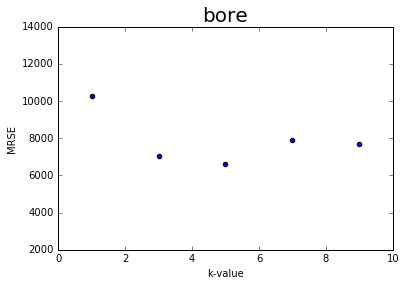

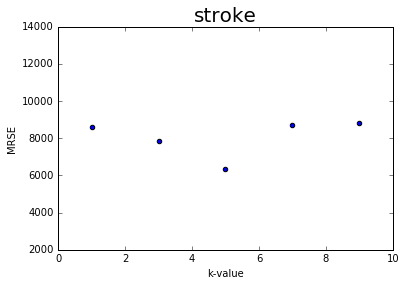

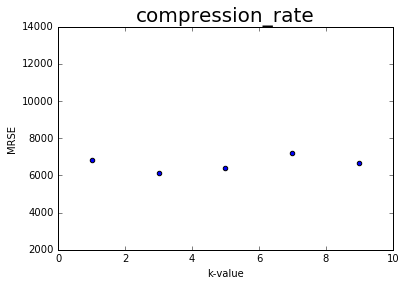

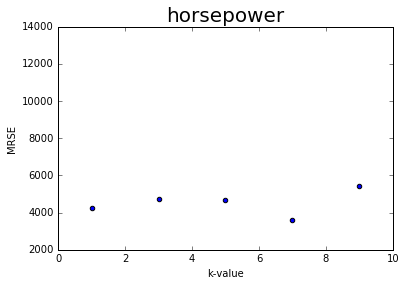

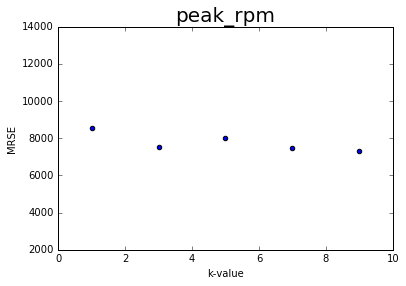

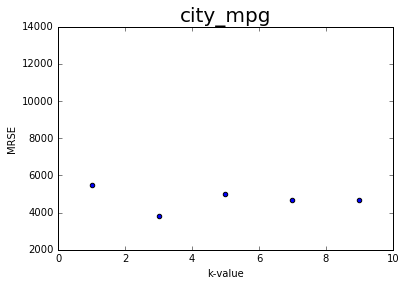

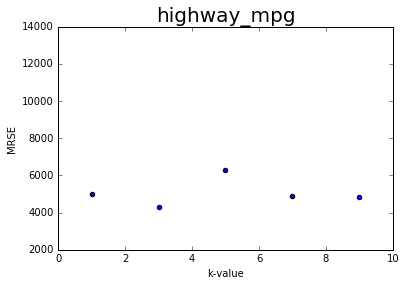

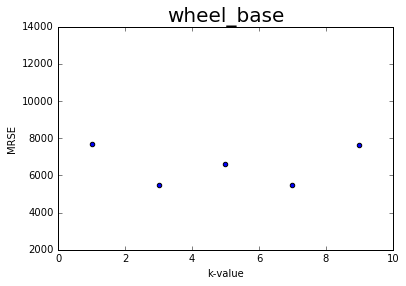

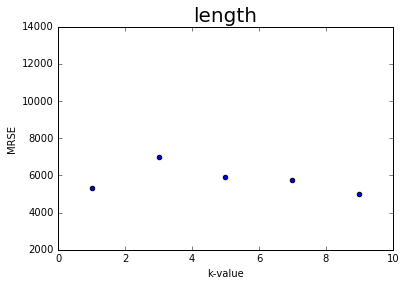

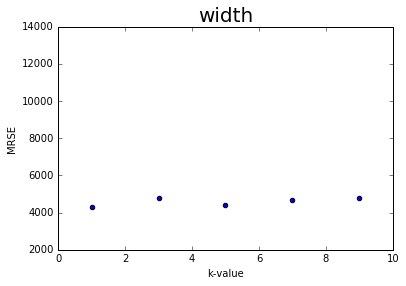

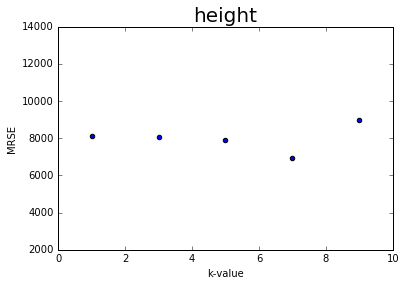

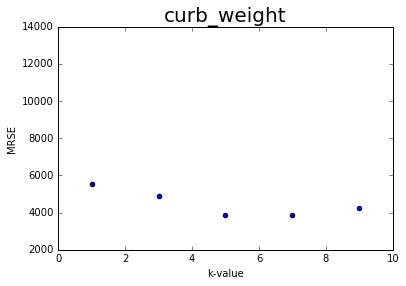

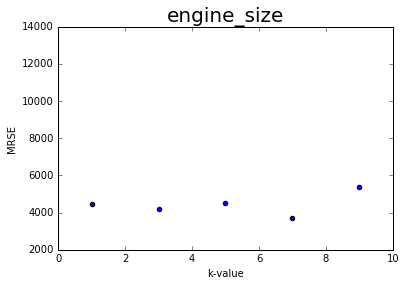

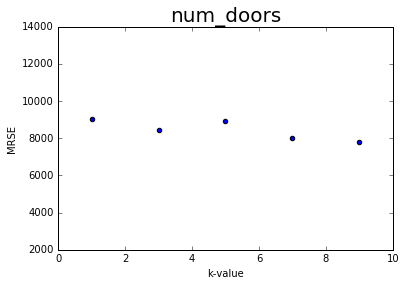

In [32]:
from importlib import reload # To fix a bug where title isnt able to call the string input

# key_max = max(mrse_list.keys(), key=(lambda k: mrse_list[k]))
# key_min = min(mrse_list.keys(), key=(lambda k: mrse_list[k]))

for num in numerical_cols:
    plt.scatter(k_list, mrse_list[num])
    reload(plt)
    plt.title(num, fontdict = {'fontsize' : 20})
    plt.xlabel('k-value')
    plt.ylabel('MRSE')
    plt.ylim (2000, 14000)
    plt.show()

univar_results = mrse_list

## 4. Multivariant input

I will use the existing function to take multiple columns

### Taking into account all columns and a k value of 5

In [33]:
mrse_list = dict()
mrse_k_list = list()
k_list = [5]

for k in k_list:
    mrse = knn_train_test(numerical_cols, 'price', cars, k)
    mrse_k_list.append(mrse)
    mrse_list = mrse_k_list
    mrse_k_list = []
    
mrse_list

[4761.066840509801]

Using the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value of 5.                  
To select which feature I would like to add I will first do the mean of those columns and then sort them in a dictionary so I can choose them for the algorithm

In [34]:
avg_rmse = dict()

for key, value in univar_results.items():
    avg_rmse[key] = sum(value)/len(value)

avg_rmse = sorted(avg_rmse.items(), key = lambda kv:(kv[1], kv[0]))
avg_rmse

[('engine_size', 4440.165312068686),
 ('curb_weight', 4479.8491994727),
 ('horsepower', 4538.799371036968),
 ('width', 4595.092320934328),
 ('city_mpg', 4725.572304259314),
 ('highway_mpg', 5059.036302269633),
 ('length', 5785.563416148021),
 ('wheel_base', 6581.167962507718),
 ('compression_rate', 6645.5775569665375),
 ('peak_rpm', 7774.552982836382),
 ('bore', 7906.619748980032),
 ('height', 7995.0089606122665),
 ('stroke', 8066.443050428132),
 ('num_doors', 8447.09463143947)]

In [35]:
print('The lowest two value for avgerage RMSE was found with ' + avg_rmse[0][0] + ' with a MRSE of ' + str(avg_rmse[0][1]))
print('and ' + avg_rmse[1][0] + ' with a MRSE of ' + str(avg_rmse[1][1]))

The lowest two value for avgerage RMSE was found with engine_size with a MRSE of 4440.165312068686
and curb_weight with a MRSE of 4479.8491994727


Making a few lists for testing of 2, 3, 4, and 5 variables. This may change with each re-run of this program so I will have to program for this.

In [36]:
var_2_list = [avg_rmse[0][0], avg_rmse[1][0]]
var_3_list = [avg_rmse[0][0], avg_rmse[1][0], avg_rmse[2][0]]
var_4_list = [avg_rmse[0][0], avg_rmse[1][0], avg_rmse[2][0], avg_rmse[3][0]]
var_5_list = [avg_rmse[0][0], avg_rmse[1][0], avg_rmse[2][0], avg_rmse[3][0], avg_rmse[4][0]]

var_all_list = [var_2_list, var_3_list, var_4_list, var_5_list]
var_all_list

[['engine_size', 'curb_weight'],
 ['engine_size', 'curb_weight', 'horsepower'],
 ['engine_size', 'curb_weight', 'horsepower', 'width'],
 ['engine_size', 'curb_weight', 'horsepower', 'width', 'city_mpg']]

In [37]:
mrse_list = dict()
mrse_k_list = list()
k_list = [5]

for col in var_all_list:
    mrse = knn_train_test(col, 'price', cars, k)
    mrse_k_list.append(mrse)
    mrse_list = mrse_k_list
    
print('2 best features: ' + str(mrse_list[0]))
print('3 best features: ' + str(mrse_list[1]))
print('4 best features: ' + str(mrse_list[2]))
print('5 best features: ' + str(mrse_list[3]))

2 best features: 3335.6329077771047
3 best features: 4187.593906049176
4 best features: 2577.575913393616
5 best features: 2923.171723445695


## 5. Now to optimise the model with the best results in the previous step

In this case it was '2 best features' but in future runs when the data is split differently due to the random splitting, the chosen set may be different.           
For the sake of curiosity, I will also explore the 3 best and 4 best for optimising with k


In [38]:
var_lists = [var_2_list, var_3_list, var_4_list]
var_lists

[['engine_size', 'curb_weight'],
 ['engine_size', 'curb_weight', 'horsepower'],
 ['engine_size', 'curb_weight', 'horsepower', 'width']]

In [39]:
k_list = [x for x in range(1,26)]
print(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


Testing 2 best features

In [40]:
mrse_k_list_2B = dict()

for k in k_list:
    mrse = knn_train_test(var_2_list, 'price', cars, k)
    mrse_k_list_2B[k] = mrse
    
mrse_k_list_2B

{1: 4513.490043883738,
 2: 2667.089498604116,
 3: 3748.8525615250337,
 4: 3810.516192196288,
 5: 3483.036830351376,
 6: 3751.6709668065664,
 7: 3299.3131154751372,
 8: 3712.902805263913,
 9: 5465.154161395908,
 10: 4287.639296978012,
 11: 4702.087855643804,
 12: 4151.922912890779,
 13: 4400.354308077486,
 14: 5261.5340870156915,
 15: 5097.940799115573,
 16: 4410.160422746844,
 17: 4903.325393445626,
 18: 6406.309679319302,
 19: 4459.26037529812,
 20: 5988.3096787688455,
 21: 5692.051040685982,
 22: 3726.6242420052745,
 23: 3826.3000879201763,
 24: 5362.399130712882,
 25: 5685.5430912676575}

Testing 3 best features

In [41]:
mrse_k_list_3B = dict()

for k in k_list:
    mrse = knn_train_test(var_3_list, 'price', cars, k)
    mrse_k_list_3B[k] = mrse
    
mrse_k_list_3B

{1: 2800.3282675323253,
 2: 3295.191606757872,
 3: 4543.808791095088,
 4: 3776.5546044078665,
 5: 3097.7521948971485,
 6: 3218.1488273326463,
 7: 4064.1928397250567,
 8: 3435.4176530153873,
 9: 4273.796328036548,
 10: 4838.079868272348,
 11: 4474.630914386347,
 12: 3459.4156303992136,
 13: 5419.9245003928245,
 14: 3824.83833016764,
 15: 4907.720602586022,
 16: 5815.272815946483,
 17: 4391.306776821748,
 18: 4686.770420507567,
 19: 4626.6149598815555,
 20: 3952.2962374315825,
 21: 5085.453778637895,
 22: 4899.01843116393,
 23: 4802.721304409559,
 24: 4224.633693122811,
 25: 3747.270498100274}

Testing 4 best features


In [42]:
mrse_k_list_4B = dict()

for k in k_list:
    mrse = knn_train_test(var_4_list, 'price', cars, k)
    mrse_k_list_4B[k] = mrse
    
mrse_k_list_4B

{1: 3113.497388805555,
 2: 2481.3506622222685,
 3: 4148.927731900431,
 4: 4739.884668250572,
 5: 4233.1135503665655,
 6: 4241.796867680802,
 7: 3784.196734104685,
 8: 3767.094710620789,
 9: 3376.7224121907866,
 10: 4705.205368262341,
 11: 5140.076225668132,
 12: 2929.3555401200097,
 13: 3281.687728111203,
 14: 4407.175562113445,
 15: 3057.2376151178582,
 16: 4051.67320591861,
 17: 3876.722138089771,
 18: 3523.4998932031367,
 19: 4947.990148052516,
 20: 5103.299222741273,
 21: 5097.575776539012,
 22: 5900.526176383833,
 23: 4674.435013433167,
 24: 5066.664760703662,
 25: 5932.423442417989}

In [43]:
mrse_k_list_2B = sorted(mrse_k_list_2B.items(), key = lambda kv:(kv[1], kv[0]))
mrse_k_list_3B = sorted(mrse_k_list_3B.items(), key = lambda kv:(kv[1], kv[0]))
mrse_k_list_4B = sorted(mrse_k_list_4B.items(), key = lambda kv:(kv[1], kv[0]))

In [44]:
top_3 = [mrse_k_list_2B[0], mrse_k_list_3B[0], mrse_k_list_4B[0]]

In [45]:
top_3

[(2, 2667.089498604116), (1, 2800.3282675323253), (2, 2481.3506622222685)]

In [68]:
print('The results are: ')
print('For 2 best features the k value ' +  str(mrse_k_list_2B[0][0]) + ' with a score of ' + str(round(mrse_k_list_2B[0][1])))
print('For 3 best features the k value ' +  str(mrse_k_list_3B[0][0]) + ' with a score of ' + str(round(mrse_k_list_3B[0][1])))
print('For 4 best features the k value ' +  str(mrse_k_list_4B[0][0]) + ' with a score of ' + str(round(mrse_k_list_4B[0][1])))

The results are: 
For 2 best features the k value 2 with a score of 2667.0
For 3 best features the k value 1 with a score of 2800.0
For 4 best features the k value 2 with a score of 2481.0


## Summary

Here I could show how the k-nearest neighbours can be used to predict prices of cars based on a database of their features. After cleaning the data, univariant testing was conducted to obtain a prediction price and this was scored for each feature individually with a k_list = [1, 3, 5, 7, 9]. Unfortunately these scores were still quite high, so we pursued a multivariant approach and evaluated the best features that most reliably give a price prediction on a test dataset. 
The final results show the best features to be ['engine_size', 'curb_weight', 'horsepower', 'width'] and the best scores of 4 features with 2481. (Please note results can vary with every iteration due to splitting.

Thanks for reading!
All the very best!
Bill